<a href="https://colab.research.google.com/github/manoharpavuluri/drillingLogs_NLP/blob/main/PDF_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 460.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.7 MB/s eta 0:00:00


In [4]:
import pdfplumber
import pandas as pd
import re
import requests
import zipfile
import io



In [11]:
git_url = 'https://github.com/manoharpavuluri/drillingLogs_NLP/raw/main/5632DailyDrillingReports.zip'


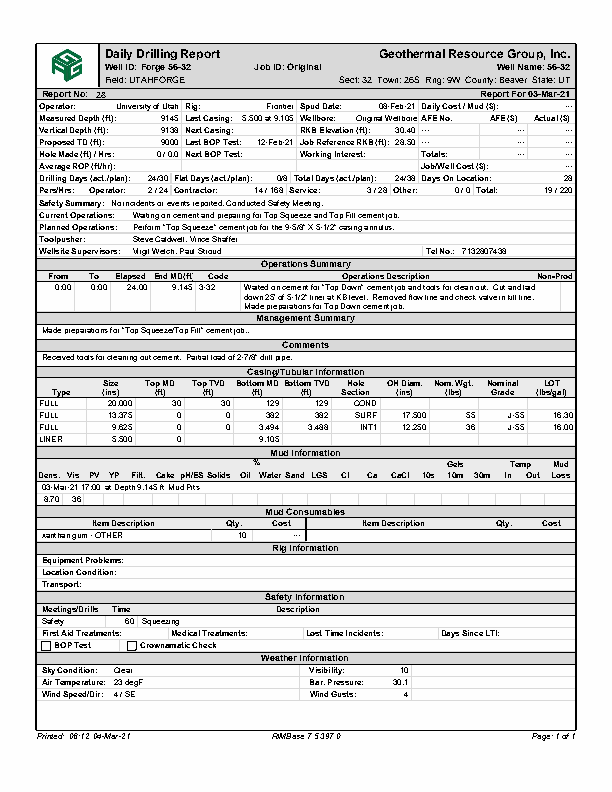

In [15]:
response = requests.get(git_url)
response.raise_for_status()
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

archive_file = zip_file.open('DailyReportDetailRpt_210304061249.pdf')
file_page1 = pdfplumber.open(archive_file).pages[0]
im1 = file_page1.to_image()
im1

In [17]:
text = file_page1.extract_text(keep_blank_chars=True)
print(text)

Daily Drilling Report Geothermal Resource Group, Inc.
Well ID: Forge 56-32 Job ID: Original Well Name: 56-32
Field: UTAHFORGE Sect: 32  Town: 26S  Rng: 9W  County: Beaver  State: UT
Report No: 28 Report For 03-Mar-21
Operator: University of Utah Rig: Frontier Spud Date: 08-Feb-21 Daily Cost / Mud ($): ---
Measured Depth (ft): 9145 Last Casing: 5.500 at 9,105 Wellbore: Original Wellbore AFE No. AFE ($) Actual ($)
Vertical Depth (ft): 9138 Next Casing: RKB Elevation (ft): 30.40 --- --- ---
Proposed TD (ft): 9000 Last BOP Test: 12-Feb-21 Job Reference RKB (ft): 28.50 --- --- ---
Hole Made (ft) / Hrs: 0 / 0.0 Next BOP Test: Working Interest: Totals: --- ---
Average ROP (ft/hr): Job/Well Cost ($): ---
Drilling Days (act./plan): 24/30 Flat Days (act./plan): 0/8 Total Days (act./plan): 24/38 Days On Location: 28
Pers/Hrs: Operator: 2 / 24 Contractor: 14 / 168 Service: 3 / 28 Other: 0 / 0 Total: 19 / 220
Safety Summary: No incidents or events reported. Conducted Safety Meeting.
Current Operati

In [18]:
core_pat = re.compile(r"LOCATION[\-\s]+(.*)\n\s+Flags =e", re.DOTALL)
core = re.search(core_pat, text).group(1)
print(core)


AttributeError: 'NoneType' object has no attribute 'group'